<a href="https://colab.research.google.com/github/sclee0620/CERN_GUI_instruments_data_analysis/blob/master/CNN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial on CNN
We try to build a DNN that recognize if an image contains a rectangle or a circle

## Import useful stuff

In [ ]:
from keras.layers import Input,Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import Model
import numpy as np
from math import *
from matplotlib import pyplot as plt 

## Lets generate some data

We now generate ourself some images with a circle or a rectangle, of random color, in a random position

### Exercise
1. Try adding more classes such e.g. Lines or Ellipses

2. Try adding some random noise in the image background

In [ ]:
import cv2

def randomColor():
  return (int(np.random.rand()*128+128),int(np.random.rand()*128+128),int(np.random.rand()*128+128))

def drawCircle(c,x,y,r):
  img = np.zeros((64,64,3), np.uint8)
  cv2.circle(img,(x,y),r,c, -1)
  return img

def genCircle():
  return drawCircle(randomColor(),int(np.random.rand()*50)+10,int(np.random.rand()*50)+10,
                    int(np.random.rand()*6)+3)

def drawRectangle(c,x,y,w,h):
  img = np.zeros((64,64,3), np.uint8)
  cv2.rectangle(img,(x,y),((x+w),(y+h)), c, -1)
  return img

def genRectangle():
  return drawRectangle(randomColor(),int(np.random.rand()*40)+10,int(np.random.rand()*40)+10,
                       int(np.random.rand()*12)+5,int(np.random.rand()*12)+5)


nsamples=50000
rects=np.stack([genRectangle() for x in range(nsamples)])
circs=np.stack([genCircle() for x in range(nsamples)])


Let's show one of the generated image

(50000, 64, 64, 3)


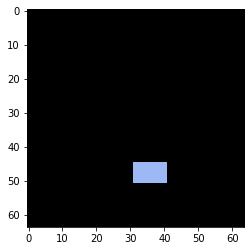

In [ ]:
print(rects.shape)
plt.imshow(rects[8])


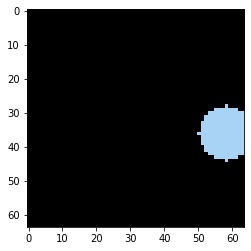

In [ ]:
plt.imshow(circs[0])

We concatenate zeroes and ones as labels and the shuffle with the same permutation both the data and the labels.
## Exercise
3. If we have more categories (let say N) we should use a categorical label that is a vector of length N with 1 on the category(/ies) the image belong to and 0 in the others. Try to build a categorical label for two categories (e.g. using numpy "tile" function to repeat the same raw multiple times )
4. Expand the categorical label to  Ellispes or  Lines  and possibly also non exclusive categories such has 2D vs 1D objects

In [ ]:
labels=np.concatenate((np.zeros(rects.shape[0]),np.ones(circs.shape[0])))
data=np.concatenate((rects,circs))
permutation = np.random.permutation(data.shape[0])
data=data[permutation]
labels=labels[permutation]

# Let's build a CNN 

Now we build our first CNN. We have some Conv layers interleaved with MaxPooling

Finally we flatten the output of the convolutional stack and appply a Dense FF

### MaxPooling
![alt text](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

### Exercise
5. Try adding/removing convolutional layers, change the kernel size, try to add dropout
6. Try changing the model to categorical labels, change loss function from binary_crossentropy to categorical_crossentropy, and use softmax activation instead of sigmoid


In [ ]:
inputs=Input(shape=(64,64,3,))
conv=True
if conv:
  hidden=  Conv2D(4,(5,5), activation='relu')(inputs)
  hidden=  Conv2D(3,(3,3), activation='relu')(hidden)
  hidden= MaxPooling2D((8,8))(hidden)
  hidden=  Conv2D(3,(3,3), activation='relu')(hidden)
  hidden= MaxPooling2D((4,4))(hidden)
  hidden= Flatten()(hidden)
  hidden=  Dense(10, activation='relu')(hidden)
  hidden=  Dense(10, activation='relu')(hidden)
  hidden=  Dense(10, activation='relu')(hidden)
else :
  hidden=Dense(50, activation='relu')(Flatten()(inputs))
outputs = Dense(1, activation='sigmoid')(hidden)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 4)         304       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 3)         111       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 3)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 3)           84        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 3)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3)                 0   

And now let's fit it to our data.
The sample is automatically split in two so that 50% of it is used for validation and the other half for training


In [ ]:
history=model.fit(data,labels,validation_split=0.5,epochs=5)

Train on 50000 samples, validate on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 28s 559us/step - loss: 0.1118 - acc: 0.9372 - val_loss: 4.9207e-04 - val_acc: 1.0000
Epoch 2/20
50000/50000 [==============================] - 27s 537us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 1.0355e-04 - val_acc: 1.0000
Epoch 3/20
50000/50000 [==============================] - 24s 485us/step - loss: 5.7824e-05 - acc: 1.0000 - val_loss: 2.1587e-05 - val_acc: 1.0000
Epoch 4/20
50000/50000 [==============================] - 24s 476us/step - loss: 1.2080e-05 - acc: 1.0000 - val_loss: 6.4775e-06 - val_acc: 1.0000
Epoch 5/20
50000/50000 [==============================] - 24s 471us/step - loss: 4.0465e-06 - acc: 1.0000 - val_loss: 2.4544e-06 - val_acc: 1.0000
Epoch 6/20
50000/50000 [==============================] - 24s 474us/step - loss: 1.9717e-06 - acc: 1.0000 - val_loss: 1.2519e-06 - val_acc: 1.0000
Epoch 7/20
50000/50000 [==============================] - 24s 473us/step - l

*history* contains information about the training.  We can now now show the loss vs epoch for both validation and training samples.




dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


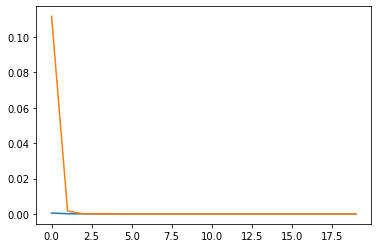

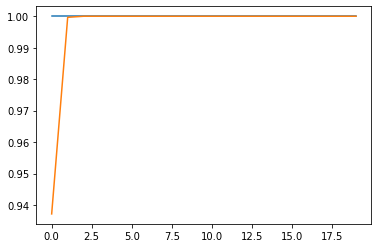

In [ ]:
print(history.history.keys())
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.show()
plt.plot(history.history["val_acc"])
plt.plot(history.history["acc"])
plt.show()


In [ ]:
print(model.predict(np.expand_dims(genRectangle(),axis=0) ))
print(model.predict(np.expand_dims(genCircle(),axis=0) ))


[[0.]]
[[1.]]


Let's try to mix an image with circles and rectangles and see how the network would evaluate it 

Looks like a circle


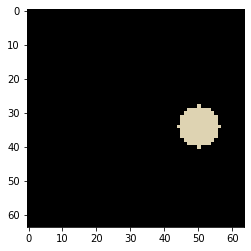

In [ ]:
im=genCircle()
print("Looks like a", ("circle" if model.predict(np.expand_dims(im,axis=0) )> 0.5 else "rectangle"))
plt.imshow(im)

The following code can be used to visualize what features the first conv layer is looking at

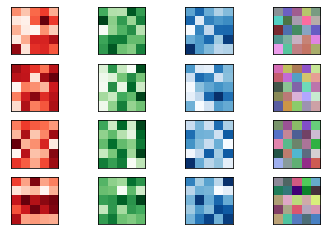

In [ ]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix =4, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 4, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap=['Reds','Greens','Blues'][j])
		ix += 1
	ax = plt.subplot(n_filters, 4, ix)
	ax.set_xticks([])
	ax.set_yticks([])
	plt.imshow(f)
	ix += 1


# show the figure
plt.show()